If you set all covariance matrices to σ2I (i.e., spherical) and drive σ2 to 0, this produces hard assignments. Therefore, when we run K-means,g it’s as if we’re doing GMM with EM but instead of letting each cluster have its own covariance matrix, they all have to be round covariance matrices and we make σ2 tiny so there’s no longer any notion of shared membership between clusters. As a side note, K-means is sometimes used to initialize GMM/EM fitting

In [2]:
%matplotlib inline

In [138]:
import numpy as np
import csv
import matplotlib
from  matplotlib import pyplot as plt
# from sklearn import cross_validation
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn import metrics, preprocessing
import pickle
import numpy.linalg as la
import random
from math import sqrt
from numpy import linalg
import math
from mpl_toolkits.mplot3d import Axes3D

In [4]:
df = pd.read_csv("data.csv")

In [5]:
df.head(5)

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [6]:
X= df.as_matrix()

## practice

In [8]:
centers = X[np.random.choice(range(X.shape[0]),2, replace=False) , : ]

In [9]:
centers

array([[  4.05 ,  81.   ],
       [  1.833,  54.   ]])

In [10]:
 N, d = X.shape

In [11]:
Sigma= [np.eye(d)] * 2

In [14]:
Sigma

[array([[ 1.,  0.],
        [ 0.,  1.]]), array([[ 1.,  0.],
        [ 0.,  1.]])]

In [15]:
w =  [1./ 2] * 2

In [16]:
w

[0.5, 0.5]

In [17]:
 R = np.zeros((N, 2))

In [22]:
R[0:5]

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [38]:
linalg.det(Sigma[1])

1.0

In [44]:
X.shape[0]

272

In [ ]:
P = lambda mu, s: np.linalg.det(s) ** -.5 ** (2 * np.pi) ** (-X.shape[1]/2.) \
                * np.exp(-.5 * np.einsum('ij, ij -> i',\
                        X - mu, np.dot(np.linalg.inv(s) , (X - mu).T).T ) ) 

In [164]:
def MVLikelihood(X, mu, cov):
    L = np.zeros(N)
    """mu is the matrix of centers, X is the entire data set, cov is the covariance matrix for one mean center"""
    determinant = linalg.det(cov) ** -.5
    prefactor = (2 * np.pi) ** (-X.shape[1]/2.)
    inverse = linalg.inv(cov)
    submeans = X - np.tile(mu,(X.shape[0],1))
    for x in range (X.shape[0]):
        L[x] = prefactor * np.exp(-0.5 * np.dot(submeans[x, :], np.dot(inverse, submeans[x, :])))
    return L 

In [66]:
p = CO_MVN_Likelihood(X, centers[0], Sigma[0])

In [56]:
determinant = linalg.det(Sigma[0]) ** -.5

In [57]:
determinant

1.0

In [58]:
prefactor = (2 * np.pi) ** (-X.shape[1]/2.)

In [59]:
prefactor

0.15915494309189535

In [60]:
inverse = linalg.inv(Sigma[0])

In [61]:
inverse

array([[ 1.,  0.],
       [ 0.,  1.]])

In [69]:
submeans = X - np.tile(centers[0],(X.shape[0],1))

In [71]:
np.dot(inverse, submeans[0])

array([-0.45, -2.  ])

In [72]:
np.dot(submeans[0], np.dot(inverse, submeans[0]))

4.2024999999999997

In [73]:
np.dot(submeans[0], np.dot(inverse, submeans[0]))*-.5

-2.1012499999999998

In [74]:
np.exp(np.dot(submeans[0], np.dot(inverse, submeans[0]))*-.5)

0.12230345334690061

In [76]:
prefactor *np.exp(np.dot(submeans[0], np.dot(inverse, submeans[0]))*-.5)

0.019465199157368246

In [81]:
R[:, 0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [165]:
 for k in range(2):
                R[:, k] = w[k] * MVLikelihood(X, centers[k], Sigma[k])

In [169]:
R[:, 0]

array([  9.73259958e-003,   3.17061547e-161,   1.40910164e-012,
         6.80204829e-081,   2.37561587e-005,   6.50915800e-149,
         1.47513110e-012,   2.41247024e-005,   3.24081281e-198,
         2.55206087e-005,   3.41313500e-161,   8.76241564e-004,
         8.74136298e-004,   5.36871922e-254,   8.71879493e-003,
         3.23611474e-185,   2.30105632e-081,   6.67297725e-004,
         9.47401748e-186,   1.05563865e-002,   2.33865076e-198,
         5.36871922e-254,   7.38400464e-004,   2.64095164e-033,
         1.62150117e-012,   9.73259958e-003,   1.46918836e-149,
         2.96396205e-007,   8.66520971e-004,   1.00080176e-002,
         9.76776073e-016,   2.44722987e-005,   8.73703595e-051,
         4.82592024e-002,   1.77971345e-012,   2.41252389e-185,
         2.46963034e-239,   3.55232188e-002,   5.42284886e-108,
         1.56744675e-019,   4.61423430e-002,   1.02376513e-117,
         7.73435138e-004,   7.60660331e-118,   8.96826954e-016,
         8.23247363e-003,   1.36462164e-

In [172]:
np.sum(np.log(np.sum(R, axis = 1)))

-5220.1286428717694

In [173]:
  R = (R.T / np.sum(R, axis = 1)).T

In [174]:
R

array([[  1.00000000e+000,   3.29260204e-136],
       [  3.98648296e-160,   1.00000000e+000],
       [  1.00000000e+000,   2.53729020e-077],
       [  7.46870510e-066,   1.00000000e+000],
       [  1.00000000e+000,   1.83447576e-207],
       [  2.34038201e-147,   1.00000000e+000],
       [  1.00000000e+000,   8.41135936e-243],
       [  1.00000000e+000,   1.45155393e-206],
       [  3.69114842e-195,   1.00000000e+000],
       [  1.00000000e+000,   2.75239034e-207],
       [  4.28907194e-160,   1.00000000e+000],
       [  1.00000000e+000,   3.82443075e-195],
       [  1.00000000e+000,   4.63224728e-125],
       [  2.95659126e-242,   1.00000000e+000],
       [  1.00000000e+000,   3.58609050e-184],
       [  3.17721656e-183,   1.00000000e+000],
       [  2.29116549e-066,   1.00000000e+000],
       [  1.00000000e+000,   5.39991778e-196],
       [  9.03902768e-184,   1.00000000e+000],
       [  1.00000000e+000,   7.79290138e-137],
       [  2.64689600e-195,   1.00000000e+000],
       [  2.9

In [175]:
N_ks = np.sum(R, axis = 0)

In [176]:
N_ks

array([ 171.99999965,  100.00000035])

In [123]:
class GMM:
    def __init__(self, k = 2, eps = 0.0001):
        self.k = k ## number of clusters
        self.eps = eps ## threshold to stop `epsilon`
        
        # All parameters from fitting/learning are kept in a named tuple
        from collections import namedtuple
    # P =1? In notes it shows that p =1
   
    
    def EM(self, X, max_iters = 1000):
        
        # N = number of observations, d = dimension of data points        
        N, d = X.shape
        
        # randomly choose the starting centers  
        centers = X[np.random.choice(range(X.shape[0]),self.k, replace=False) , : ]
        
        ##initialize the covariance matrices:
        Sigma= [np.eye(d)] * self.k
        
        # initialize the weights for each gaussian
        w = [1./self.k] * self.k
        
         #initialize responsiblity matrix for each of n points and k gaussians to all zeroes
        R = np.zeros((N, self.k))
        
        def MVLikelihood(X, mu, cov):
            L = np.zeros(X.shape[0])
            """Input:
                mu is the vector of one meancenter, 
                X is the entire data set
                cov is the covariance matrix for one mean center
                Ouptut: A  array of length N with the likelihood that we observe that set of features """
            determinant = linalg.det(cov) ** -.5
            prefactor = (2 * np.pi) ** (-X.shape[1]/2.)
            inverse = linalg.inv(cov)
            submeans = X - np.tile(mu,(X.shape[0],1))
            for x in range (X.shape[0]):
                L[x] = prefactor * np.exp(-0.5 * np.dot(submeans[x, :], np.dot(inverse, submeans[x, :])))
            return L 
        
        # Iterate till max_iters specified, or eps is met. 
        log_likelihoods = []
        while len(log_likelihoods) < max_iters:

            ##########    
            # E - Step#
            ###########
            
            ## calculate the membership for each of k -gaussians
            for k in range(self.k):
                R[:, k] = w[k] * MVLikelihood(X, centers[k], Sigma[k])
                
                
            ## log_likelihoods
            log_likelihood = np.sum(np.log(np.sum(R, axis = 1)))
            log_likelihoods.append(log_likelihood)

            R = (R.T / np.sum(R, axis = 1)).T
            
            ## The number of datapoints belonging to each gaussian            
            N_ks = np.sum(R, axis = 0)
            
            ###########
            # M Step ##
            ###########
            ## calculate the new mean and covariance for each gaussian using the responsibilities from the E-Step
            for k in range(self.k):
                
                ## means
                centers[k] = 1. / N_ks[k] * np.sum(R[:, k] * X.T, axis = 1).T
                new_mu = np.matrix(X - centers[k])
                
                ## covariances
                Sigma[k] = np.array(1 / N_ks[k] * np.dot(np.multiply(new_mu.T,  R[:, k]), new_mu))
                
                ## weights 
                w[k] = 1. / N * N_ks[k]
            # check for convergence
            if len(log_likelihoods) < 2 : continue
            if np.abs(log_likelihood - log_likelihoods[-2]) < self.eps: break
            
            ## return all results 
            
        from collections import namedtuple
        self.params = namedtuple('params', ['mu', 'Sigma', 'w', 'log_likelihoods', 'num_iters'])
        self.params.means = centers
        self.params.cov = Sigma
        self.params.weights = w
        self.params.log_likelihoods = log_likelihoods
        self.params.num_iters = len(log_likelihoods)       
        
        return self.params
        

In [127]:
gmm = GMM(2, 0.0001 )

In [128]:
gmm_fitted = gmm.EM(X, max_iters = 1000)

In [129]:
gmm_fitted.num_iters

16

In [158]:
n = 1
coords = []
num_iters = []
while n < 50:
    gmm_fitted = gmm.EM(X, max_iters = )
    coords.append(gmm_fitted.means[0])
    coords.append(gmm_fitted.means[1])
    num_iters.append(gmm_fitted.num_iters)
    num_iters.append(gmm_fitted.num_iters)
    n+=1
    

In [159]:
coords

[array([  3.48778309,  70.89705882]),
 array([  4.72703559,  76.11040674]),
 array([  2.03511422,  54.46587841]),
 array([  4.28851362,  79.95414543]),
 array([  2.03511413,  54.46587752]),
 array([  4.28851353,  79.9541444 ]),
 array([ nan,  nan]),
 array([ nan,  nan]),
 array([  2.03511423,  54.46587856]),
 array([  4.28851363,  79.95414561]),
 array([  2.03511421,  54.46587833]),
 array([  4.28851361,  79.95414534]),
 array([  2.03511422,  54.46587839]),
 array([  4.28851361,  79.95414541]),
 array([  2.03511412,  54.46587744]),
 array([  4.28851353,  79.95414431]),
 array([  3.48778309,  70.8970588 ]),
 array([  4.08430407,  92.94783724]),
 array([  4.28851361,  79.95414534]),
 array([  2.03511421,  54.46587833]),
 array([  3.48778309,  70.89705881]),
 array([  4.0830779 ,  92.99688385]),
 array([  3.48778309,  70.89705882]),
 array([  4.74616465,  75.77884811]),
 array([  4.28851363,  79.95414558]),
 array([  2.03511423,  54.46587854]),
 array([  2.03511412,  54.46587744]),
 array

In [161]:
x = []
y = []
z = num_iters
for row in coords:
    x.append(row[0])
    y.append(row[1])
print(len(x), len(y), len(z))


98 98 98


//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


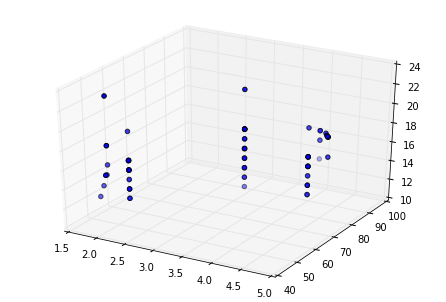

In [162]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(xs=x, ys=y, zs=z, zdir='z', label='ys=0, zdir=z')
plt.show()

In [135]:
num_iters

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 12,
 19,
 18,
 19,
 18,
 12,
 15,
 14,
 15,
 27,
 19,
 19,
 13,
 31,
 19,
 19,
 12,
 35,
 19,
 13,
 18,
 19,
 16,
 19,
 16,
 19,
 16,
 13,
 14,
 13,
 19,
 19]

# D)

In [10]:
def getFirstMeans(trainData,k):
    firstMeans = []
    idxs = [x for x in range(len(trainData))]
    meanIdxs = random.sample(idxs,k)
    for idx in meanIdxs:
        firstMeans.append(trainData.iloc[idx].values)
    return firstMeans

def clustering(trainData,clusterMeans,k):
    rowIdxs = [i for i in range(len(trainData))]
    clusters = []
    for num in range(k):
        clusters.append([])
    
    for row in rowIdxs :
        distances = []
        for mean in clusterMeans:
            dist = np.linalg.norm(trainData.iloc[row] - mean)
            distances.append(dist)
        clusterIdx = np.argmin(distances)
        
        clusters[clusterIdx].append(row)
    return clusters
    
def newMeans(trainData,clusters):
    means = []
    for cluster in clusters:
        clusterMean = np.mean(trainData.iloc[cluster])
        means.append(clusterMean)
    return means

def KMeans(trainData,k):
    iters = 0
    initMeans = getFirstMeans(trainData,k)
    clusters1 = clustering(trainData,initMeans,k)
    means1 =  newMeans(trainData,clusters1)
    clusters2 = clustering(trainData,means1,k)
    means2 = newMeans(trainData,clusters2)
    
    while clusters1 != clusters2:
        print ("iteration: " + str(iters+1))
        clusters1 = clustering(trainData,means2,k)
        means1 = newMeans(trainData,clusters1)
        clusters2 = clustering(trainData,means1,k)
        means2 = newMeans(trainData,clusters2)
        iters += 1
    
    clusters = np.zeros(len(X))
    for item in clusters2[0]:
        clusters[item] = 0
    for item in clusters1[1]:
        clusters[item] = 1
#     return clusters2
    return clusters

In [11]:
kMeansCluster = KMeans(df,2)

iteration: 1
iteration: 2


In [13]:
kMeansCluster

array([ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,
        0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
        1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,
        0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,
        1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,
        1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,
        1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,
        1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,
        0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,
        1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,
        1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0